In [1]:
#pip install beautifulsoup4
#pip install pandas

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import pandas as pd

In [3]:
#call to the webpage and take all the HTML content
r = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
#find the table 
data = []
table = soup.find('table',{'class':'wikitable sortable'})

In [5]:
#Take the rows and columns of the table 
table_body = table.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [6]:
#Convert the data into the pandas Data Frame 
df=pd.DataFrame(data)
df.columns = ['Postcode','Borough','Neighbourhood']

In [7]:
#Drop the first row  
df=df.drop(index=0)

In [8]:
df.head()

,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [9]:
#Drop all elements "not assigned"  
df=df[df['Borough'] != 'Not assigned']
df1=df[['Postcode','Neighbourhood']]
dfx=df[['Postcode','Borough']]

In [10]:
#Group the elements with the same postcode
df1=df1.groupby('Postcode').agg(lambda x: x.tolist())

In [11]:
df1['Neighbourhood']=df1['Neighbourhood'].apply(', '.join)
#df1['Borough']=df1['Borough'].apply(', '.join)

In [12]:
df1=dfx.merge(df1, on='Postcode', how='left')
df1.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M6A,North York,"Lawrence Heights, Lawrence Manor"


In [13]:
#Shape the dataframe
df1.shape

(210, 3)

In [14]:
df1.reset_index().head()

,index,Postcode,Borough,Neighbourhood
0,0,M3A,North York,Parkwoods
1,1,M4A,North York,Victoria Village
2,2,M5A,Downtown Toronto,Harbourfront
3,3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,4,M6A,North York,"Lawrence Heights, Lawrence Manor"


In [15]:
data = pd.read_csv("/Users/aritz/Downloads/Geospatial_Coordinates.csv") 

In [16]:
data.rename(columns={'Postal Code':'Postcode'}, inplace=True)

In [17]:
df2=df1.merge(data, on='Postcode', how='left')

In [18]:
df2.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763


In [19]:
#pip install folium

In [20]:
#pip install folium==0.5.0

In [21]:
import folium 

print('Folium installed and imported!')

Folium installed and imported!


In [22]:
# define the world map
world_map = folium.Map()

In [23]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)

# display world map
world_map

In [24]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df2.Latitude, df2.Longitude):
    incidents.add_child(
        folium.features.RegularPolygonMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            #fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add incidents to map
world_map.add_child(incidents)

In [25]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map()
world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df2.Latitude, df2.Longitude):
    incidents.add_child(
        folium.features.RegularPolygonMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            #fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df2.Latitude)
longitudes = list(df2.Longitude)
labels = list(df2.Postcode)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
# add incidents to map
world_map.add_child(incidents)

In [26]:
df2['Neighbourhood'] = df2['Neighbourhood'].astype('str') 
df2.dtypes

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

In [27]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df2.Latitude, df2.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# add pop-up text to each marker on the map
latitudes = list(df2.Latitude)
longitudes = list(df2.Longitude)
labels = list(df2.Neighbourhood)

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
world_map.add_child(incidents)

In [28]:
from folium import plugins

In [29]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(world_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df2.Latitude, df2.Longitude, df2.Postcode):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
world_map

In [30]:
# instantiate a feature group for the incidents in the dataframe
world_map2 = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(world_map2)

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df2.Latitude, df2.Longitude):
    incidents.add_child(
        folium.features.RegularPolygonMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            #fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
world_map2.add_child(incidents)

--------------------

In [31]:
#pip install geolocation-python

In [32]:
#pip install geopy

In [33]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [34]:
CLIENT_ID = 'UVAZ5WK4U0ACECGTCPKPUZXC0V4T2Z5FBQ3A3PCWIJHJU5IG' # your Foursquare ID
CLIENT_SECRET = 'VSKAFU1OOYKDPOTU4O13SSTZDFYLP1DXM4L0TAIIEA415C0V' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + 'UVAZ5WK4U0ACECGTCPKPUZXC0V4T2Z5FBQ3A3PCWIJHJU5IG')
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UVAZ5WK4U0ACECGTCPKPUZXC0V4T2Z5FBQ3A3PCWIJHJU5IG
CLIENT_SECRET:VSKAFU1OOYKDPOTU4O13SSTZDFYLP1DXM4L0TAIIEA415C0V


In [35]:
address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [36]:
search_query = 'paper'
radius = 100000
print(search_query + ' .... OK!')

paper .... OK!


In [37]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UVAZ5WK4U0ACECGTCPKPUZXC0V4T2Z5FBQ3A3PCWIJHJU5IG&client_secret=VSKAFU1OOYKDPOTU4O13SSTZDFYLP1DXM4L0TAIIEA415C0V&ll=43.653963,-79.387207&v=20180604&query=paper&radius=100000&limit=30'

In [38]:
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
pd.DataFrame(dataframe).head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",False,4b0391fff964a520ce4f22e3,887 Queen St W,CA,Toronto,Canada,nr Walnut Ave.,2174,"[887 Queen St W (nr Walnut Ave.), Toronto ON M...","[{'label': 'display', 'lat': 43.645665, 'lng':...",43.645665,-79.411644,M6J 1G5,ON,The Paper Place,v-1575028931,102345330
1,"[{'id': '52c71aaf3cf9994f4e043d17', 'name': 'M...",False,5aada8b892e7a9541a5fa628,191 Baldwin St,CA,Toronto,Canada,NaN,1133,"[191 Baldwin St, Toronto ON M5T 1M1, Canada]","[{'label': 'display', 'lat': 43.654556, 'lng':...",43.654556,-79.401260,M5T 1M1,ON,Lit Paper & Glass,v-1575028931,NaN
2,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",False,4bb0e9dcf964a52081693ce3,99 Yorkville Ave,CA,Toronto,Canada,NaN,1927,"[99 Yorkville Ave, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67094261959884...",43.670943,-79.391872,NaN,ON,Paper Things,v-1575028931,NaN
3,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",False,5b4b74136adbf5002c9ea46c,1 Yonge St,CA,Toronto,Canada,NaN,1615,"[1 Yonge St, Toronto ON M5E 1W7, Canada]","[{'label': 'display', 'lat': 43.6429251, 'lng'...",43.642925,-79.374186,M5E 1W7,ON,Crepe Paper Crafts,v-1575028931,496121219
4,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,51d44fd4498ee2747c829f44,116 Massey Street,CA,Toronto,Canada,NaN,2369,"[116 Massey Street, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.64497586917162...",43.644976,-79.413871,NaN,ON,Paper Bag Records,v-1575028931,NaN


In [39]:
# instantiate a feature group for the incidents in the dataframe
world_map2 = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(world_map2)

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(dataframe['location.lat'], dataframe['location.lng']):
    incidents.add_child(
        folium.features.RegularPolygonMarker(
            [lat, lng],
            radius=8, # define how big you want the circle markers to be
            color='brown',
            #fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
world_map2.add_child(incidents)

In [40]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map()
world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# add pop-up text to each marker on the map
latitudes = list(dataframe['location.lat'])
longitudes = list(dataframe['location.lng'])
labels = list(dataframe['name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], icon=folium.Icon(color='red', icon='info-sign'),popup=label[0:10]).add_to(world_map)    
    
# add incidents to map
world_map.add_child(incidents)

In [41]:
search_query = 'school'
radius = 100000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues)
pd.DataFrame(dataframe1).head()

school .... OK!


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",False,4ada0d95f964a520d41d21e3,575 Bay St.,CA,Toronto,Canada,at Dundas St. W,405,"[575 Bay St. (at Dundas St. W), Toronto ON M5G...","[{'label': 'display', 'lat': 43.65564568498175...",43.655646,-79.382737,NaN,M5G 2C5,ON,Ted Rogers School of Management,v-1575028935,NaN
1,"[{'id': '4d4b7105d754a06372d81259', 'name': 'C...",False,4db6ee9343a1369cb5f0e21d,155 College St.,CA,Toronto,Canada,at McCaul St.,762,"[155 College St. (at McCaul St.), Toronto ON M...","[{'label': 'display', 'lat': 43.65923191282564...",43.659232,-79.393254,NaN,M5T 3M7,ON,Dalla Lana School of Public Health,v-1575028935,NaN
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,502ba134e4b057455a9a1284,439 University Ave.,CA,Toronto,Canada,at Dundas St. W,80,"[439 University Ave. (at Dundas St. W), Toront...","[{'label': 'display', 'lat': 43.65453291877178...",43.654533,-79.387831,NaN,NaN,ON,Ontario Public School Boards' Association,v-1575028935,NaN
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4cbb27d14c60a093e14c4aca,64 Baldwin Street,CA,Toronto,Canada,NaN,678,"[64 Baldwin Street, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655623, 'lng':...",43.655623,-79.395314,NaN,NaN,ON,Beverly Junior Public School,v-1575028935,NaN
4,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",False,4ae0c938f964a520758221e3,105 St. George St.,CA,Toronto,Canada,University of Toronto,1514,"[105 St. George St. (University of Toronto), T...","[{'label': 'display', 'lat': 43.6647972002443,...",43.664797,-79.398576,NaN,M5S 3E6,ON,Rotman School of Management,v-1575028935,NaN


In [42]:
# define the world map centered around Canada with a low zoom level
# world_map = folium.Map()
# world_map = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# add pop-up text to each marker on the map
latitudes = list(dataframe1['location.lat'])
longitudes = list(dataframe1['location.lng'])
labels = list(dataframe1['name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='cloud'),popup=label[0:10]).add_to(world_map)    
    
# add incidents to map
world_map.add_child(incidents)

In [43]:
dataframe['name'][2][0:5]

'Paper'

In [44]:
dc = pd.read_csv("/Users/aritz/Downloads/Homicide.csv") 

In [45]:
dc.head()

,X,Y,Index_,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.392853,43.685028,1,111878,2004,D53,Other,2004-01-03T05:00:00.000Z,98,Rosedale-Moore Park (98),43.685028,-79.392853,1
1,-79.234962,43.781536,2,125755,2004,D42,Shooting,2004-01-08T05:00:00.000Z,137,Woburn (137),43.781536,-79.234962,2
2,-79.206894,43.810860,3,136086,2004,D42,Shooting,2004-01-08T05:00:00.000Z,132,Malvern (132),43.810860,-79.206894,3
3,-79.434403,43.670475,4,148623,2004,D13,Shooting,2004-01-25T05:00:00.000Z,93,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403,4
4,-79.203865,43.823543,5,148619,2004,D42,Shooting,2004-01-25T05:00:00.000Z,131,Rouge (131),43.823543,-79.203865,5


In [46]:
#dc2=dc[dc['TRUCK'] == 1]
#dc2.head()

In [47]:
#dcx=dc[dc['TRUCK'] == 1] & dc[dc['TRSN_CITY_VEH'] == 1]
#dcx.head()

#dc2=dc[(dc['TRUCK'] == 1)|(dc['TRSN_CITY_VEH'] == 1)|(dc['EMERG_VEH'] == 1)|(dc['PASSENGER'] == 1)|(dc['SPEEDING'] == 1)|(dc['AG_DRIV'] == 1)|(dc['REDLIGHT'] == 1)|(dc['ALCOHOL'] == 1)|(dc['DISABILITY'] == 1)|(dc['FATAL'] == 1) ]

dc2=dc[['Lat','Long']]

In [48]:
dc2=dc2[:1000]
#dc2

In [49]:
#dc2=dc2[['LATITUDE','LONGITUDE']]

In [50]:
data2=dc2.to_numpy()
data2=data2.tolist()

In [51]:
# instantiate a feature group for the incidents in the dataframe
#world_map3 = folium.Map(location=[43.6499900, -79.3820600], zoom_start=12)
incidents = plugins.HeatMap(data2).add_to(world_map)

# add incidents to map
world_map.add_child(incidents)

In [52]:
incidents

In [53]:
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df2.Latitude, df2.Longitude, df2.Postcode):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

In [54]:
dc.columns

Index(['X', 'Y', 'Index_', 'Event_Unique_ID', 'Occurrence_year', 'Division',
       'Homicide_Type', 'Occurrence_Date', 'Hood_ID', 'Neighbourhood', 'Lat',
       'Long', 'ObjectId'],
      dtype='object')

In [55]:
import matplotlib.pyplot as plt

In [56]:
dc.columns

Index(['X', 'Y', 'Index_', 'Event_Unique_ID', 'Occurrence_year', 'Division',
       'Homicide_Type', 'Occurrence_Date', 'Hood_ID', 'Neighbourhood', 'Lat',
       'Long', 'ObjectId'],
      dtype='object')

In [57]:
dc3=dc[['Homicide_Type', 'Occurrence_year']]

In [58]:
#pd.get_dummies(dc3["Homicide_Type"])
dc3.head()

,Homicide_Type,Occurrence_year
0,Other,2004
1,Shooting,2004
2,Shooting,2004
3,Shooting,2004
4,Shooting,2004


In [59]:
dc3=pd.get_dummies(dc3, columns=["Homicide_Type"])

In [60]:
dc3.head()

,Occurrence_year,Homicide_Type_Other,Homicide_Type_Shooting,Homicide_Type_Stabbing
0,2004,1,0,0
1,2004,0,1,0
2,2004,0,1,0
3,2004,0,1,0
4,2004,0,1,0


In [61]:
dc3=dc3.groupby('Occurrence_year').sum()
dc3.head()

,Homicide_Type_Other,Homicide_Type_Shooting,Homicide_Type_Stabbing
Occurrence_year,,,
2004,19,26,19
2005,15,53,12
2006,19,29,22
2007,18,44,24
2008,14,37,19


#Hacer las variables categoricas
dc3['Homicide_Type']
dc3 = pd.DataFrame(data=dc3)
uniq_lab = np.unique(dc3['Homicide_Type'])

for lab in uniq_lab:
    dc3['Homicide_Type'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(float),inplace=True)

<Figure size 864x432 with 0 Axes>

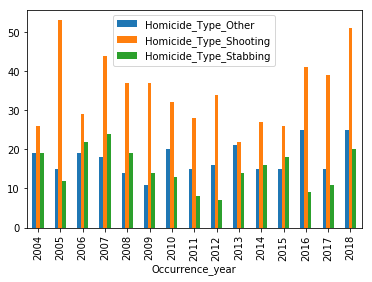

In [62]:
plt.figure(figsize=(12,6))
data = dc3
data.plot(kind='bar')
plt.show()

k-means clustering

In [63]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [64]:
dataframe1.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",False,4ada0d95f964a520d41d21e3,575 Bay St.,CA,Toronto,Canada,at Dundas St. W,405,"[575 Bay St. (at Dundas St. W), Toronto ON M5G...","[{'label': 'display', 'lat': 43.65564568498175...",43.655646,-79.382737,NaN,M5G 2C5,ON,Ted Rogers School of Management,v-1575028935,NaN
1,"[{'id': '4d4b7105d754a06372d81259', 'name': 'C...",False,4db6ee9343a1369cb5f0e21d,155 College St.,CA,Toronto,Canada,at McCaul St.,762,"[155 College St. (at McCaul St.), Toronto ON M...","[{'label': 'display', 'lat': 43.65923191282564...",43.659232,-79.393254,NaN,M5T 3M7,ON,Dalla Lana School of Public Health,v-1575028935,NaN
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,502ba134e4b057455a9a1284,439 University Ave.,CA,Toronto,Canada,at Dundas St. W,80,"[439 University Ave. (at Dundas St. W), Toront...","[{'label': 'display', 'lat': 43.65453291877178...",43.654533,-79.387831,NaN,NaN,ON,Ontario Public School Boards' Association,v-1575028935,NaN
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4cbb27d14c60a093e14c4aca,64 Baldwin Street,CA,Toronto,Canada,NaN,678,"[64 Baldwin Street, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655623, 'lng':...",43.655623,-79.395314,NaN,NaN,ON,Beverly Junior Public School,v-1575028935,NaN
4,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",False,4ae0c938f964a520758221e3,105 St. George St.,CA,Toronto,Canada,University of Toronto,1514,"[105 St. George St. (University of Toronto), T...","[{'label': 'display', 'lat': 43.6647972002443,...",43.664797,-79.398576,NaN,M5S 3E6,ON,Rotman School of Management,v-1575028935,NaN


In [65]:
dataframe2=dataframe1[['name','location.lat' , 'location.lng']]#dc.head()
dataframex=dataframe1[['location.lat' , 'location.lng']]
#scaler = MinMaxScaler()
#scaled_df = scaler.fit_transform(dataframe1[['location.lat' , 'location.lng']])
dataframe2_grouped = dataframe2.groupby('name').mean().reset_index()

In [66]:
from sklearn.preprocessing import StandardScaler
X = dataframe2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

/Users/aritz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/aritz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 0 0 0 2 2 2 2 2 2 0 2 0 0 2 2 0 0 0 2 2 0 2 2 3 1 2 2 1]


In [68]:
#dataframe1["name"] = labels

In [69]:
labels

array([2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 3, 1, 2, 2, 1], dtype=int32)

In [70]:
dataframe1.groupby(dataframe1['name']).mean()

,hasPerk,location.distance,location.lat,location.lng
name,,,,
Beverly Junior Public School,False,678,43.655623,-79.395314
Canadian National Ballet School,False,1347,43.663681,-79.377237
Church St junior Public School,False,1259,43.663915,-79.379760
Connect School Of Languages,False,1072,43.647304,-79.396823
Dalla Lana School of Public Health,False,762,43.659232,-79.393254
George Brown College - School of ESL,False,1757,43.651872,-79.365580
"George Brown College St. James (E: School Of Design, School Of Hospitality & Tourism Management)",False,1301,43.653506,-79.371055
George Brown School of Design,False,1314,43.653594,-79.370895
Heidelberg Centre - School of Graphic Communications Management,False,789,43.657503,-79.378714


In [71]:
kclusters = 4
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe2['location.lat'], dataframe2['location.lng'], dataframe2['name'], labels):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [72]:
map_clusters.add_child(incidents)

In [79]:
labels
dataframex=dataframe1[['name','location.lat' , 'location.lng']]#dc.head()
dataframex['name']=labels
dataframex=dataframex.merge(dataframe1, on='location.lng', how='right')
dataframex=dataframex[['name_x','name_y']]

/Users/aritz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
#Cluster 1

cluster_1=dataframex[dataframex['name_x'] == 0]
cluster_2=dataframex[dataframex['name_x'] == 1]
cluster_3=dataframex[dataframex['name_x'] == 2]
cluster_4=dataframex[dataframex['name_x'] == 3]

In [88]:
cluster_1.head()

,name_x,name_y
1,0,Dalla Lana School of Public Health
2,0,Ontario Public School Boards' Association
3,0,Beverly Junior Public School
4,0,Rotman School of Management
11,0,The IELTS School of Toronto


In [89]:
cluster_2.head()

,name_x,name_y
26,1,SCHOOL Restaurant
29,1,Regal Road Junior Public School


In [90]:
cluster_3.head()

,name_x,name_y
0,2,Ted Rogers School of Management
5,2,George Brown School of Design
6,2,Ryerson School of Interior Design
7,2,Ted Rogers School of Management Patio
8,2,Canadian National Ballet School


In [91]:
cluster_4.head()

,name_x,name_y
25,3,Jackman Avenue Public School Junior
